# SI 618: Applied Statistics

## Correlation and Regression
### Wine quality

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1: List the 5 largest correlations in the wine quality dataset

Feeling ambitious?  Try to get the following output:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>var1</th>
      <th>var2</th>
      <th>corr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>fixed acidity</td>
      <td>pH</td>
      <td>-0.682978</td>
    </tr>
    <tr>
      <th>14</th>
      <td>citric acid</td>
      <td>fixed acidity</td>
      <td>0.671703</td>
    </tr>
    <tr>
      <th>16</th>
      <td>density</td>
      <td>fixed acidity</td>
      <td>0.668047</td>
    </tr>
    <tr>
      <th>18</th>
      <td>free sulfur dioxide</td>
      <td>total sulfur dioxide</td>
      <td>0.667666</td>
    </tr>
    <tr>
      <th>20</th>
      <td>citric acid</td>
      <td>volatile acidity</td>
      <td>-0.552496</td>
    </tr>
  </tbody>
</table>

In [4]:
so = wine.corr().abs().unstack().sort_values(ascending=False).reset_index()
so_nosame = so[so['level_0'] != so['level_1']]

In [5]:
def swap(x):
    if (x['level_0'] > x['level_1']):
        temp = x['level_0']
        x['level_0'] = x['level_1']
        x['level_1'] = temp
    return x

In [6]:
so_alpha = so_nosame.apply(swap, axis=1).drop_duplicates()
so_alpha

,level_0,level_1,0
12,fixed acidity,pH,0.682978
14,citric acid,fixed acidity,0.671703
16,density,fixed acidity,0.668047
18,free sulfur dioxide,total sulfur dioxide,0.667666
20,citric acid,volatile acidity,0.552496
...,...,...,...
134,quality,residual sugar,0.013732
136,free sulfur dioxide,volatile acidity,0.010504
138,chlorides,free sulfur dioxide,0.005562
140,residual sugar,sulphates,0.005527


In [7]:
so_signed = so_alpha.apply(lambda x: wine.corr().loc[x.level_0][x.level_1], axis=1)
result = pd.concat([so_alpha.drop(0, axis=1), so_signed], axis=1)
result.columns = ['var1', 'var2', 'corr']
result.head()

,var1,var2,corr
12,fixed acidity,pH,-0.682978
14,citric acid,fixed acidity,0.671703
16,density,fixed acidity,0.668047
18,free sulfur dioxide,total sulfur dioxide,0.667666
20,citric acid,volatile acidity,-0.552496


The 5 largest correlations in the wine quality dataset are:
1. fixed acidity and pH
2. citric acid and fixed acidity
3. density and fixed acidity
4. free sulfur dioxide and total sulfur dioxide
5. citric acid and volatile acidity

### Q2: Create a JointGrid-based plot that contains a regplot and a histplot for "free sulphur dioxide" vs. "total sulphur dioxide".

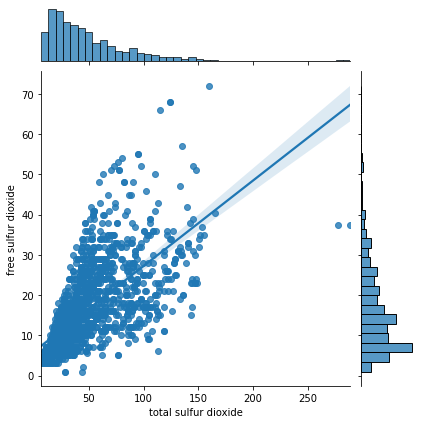

In [8]:
g = sns.JointGrid(data=wine, x='total sulfur dioxide', y='free sulfur dioxide')
g = g.plot(sns.regplot, sns.histplot)

## Ordinary Least Squares (OLS) Regression

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Remember that statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

### Q3: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [10]:
model = smf.ols("Q('total sulfur dioxide') ~ Q('free sulfur dioxide')", data=wine)
res = model.fit()
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     Q('total sulfur dioxide')   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Tue, 23 Feb 2021   Prob (F-statistic):          6.40e-207
Time:                               20:10:11   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

1. $r^2 = 0.446$
2. The p-value is 6.40e-207, which is quite small, so the regression is statistically significant.
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60 is: $60\cdot2.0997 + 13.1354 = 139.1174$

### Q4: Create an influence plot for the regression of "total sulfur dioxide" vs. "free sulfur dioxide".  

Visually identify outliers.

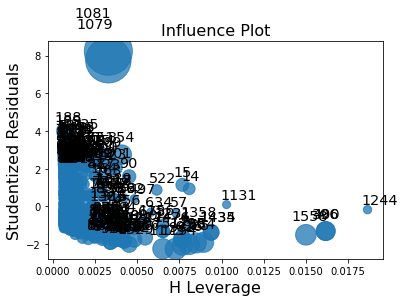

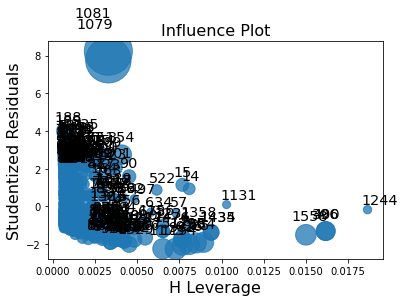

In [11]:
sm.graphics.influence_plot(res, criterion='Cooks')

There are outliers like 1081 and 1079 according to the influence plot.

In [12]:
wine.iloc[1081]

fixed acidity             7.90000
volatile acidity          0.30000
citric acid               0.68000
residual sugar            8.30000
chlorides                 0.05000
free sulfur dioxide      37.50000
total sulfur dioxide    289.00000
density                   0.99316
pH                        3.01000
sulphates                 0.51000
alcohol                  12.30000
quality                   7.00000
Name: 1081, dtype: float64

### Q5: How many influence points are there, according to statistically significant Cook's distances?


In [13]:
infl = res.get_influence()
infl.summary_frame()
c, p = infl.cooks_distance
df = pd.DataFrame({'cooks_distance':c, 'pvalues': p})
df.sort_values('pvalues')

,cooks_distance,pvalues
1081,1.075528e-01,0.898036
1079,9.588442e-02,0.908574
1154,1.871485e-02,0.981459
1558,1.735861e-02,0.982791
926,1.666267e-02,0.983476
...,...,...
194,2.499602e-08,1.000000
193,2.499602e-08,1.000000
117,2.499602e-08,1.000000
816,3.685543e-09,1.000000


Set $\alpha = 0.05$. As the p-values are large (they are all larger than 0.05), there are no influence points according to statistically significant Cook's distance.

## Hypothesis testing (t-test and ANOVA)

For this section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to 
load them into a DataFrame:

In [14]:
biopics = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv", encoding="latin1")

In [15]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that 
converts representations like '$56.7M' to '56700000'.  How?

Time for some regular expressions (yay!):

## Q6: Fill in the regular expression


In [16]:
import re
import numpy as np

def box_office_dollars(earnings):
    m = re.match(r'\$(\d+\.?\d*)([MmKk]*)',earnings)
    if not m:
        return np.NaN
    ret = m.group(1)
    if not ret:
        return np.NaN
    try:
        ret = float(ret)
    except:
        return np.NaN
    if m.group(2) == 'M':
        return ret * 1000000
    if m.group(2) == 'K':
        return ret * 1000
    return ret

# Test out our function, which should print 537000.0 given $537K
box_office_dollars("$537K")


537000.0

And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [17]:
biopics['box_office_dollars'] = biopics['box_office'].apply(box_office_dollars)

In [18]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0


## Q7: What should we do with our missing values:

In [19]:
biopics.dropna(subset=['box_office_dollars'], inplace=True)

In [20]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0


As always, let's take a look at the distribution of our variable:


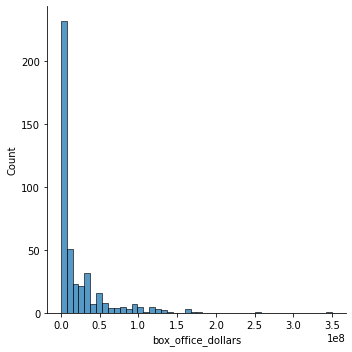

In [21]:
sns.displot(biopics['box_office_dollars'])

Hmmmm.  That doesn't look good (why?) . 

Let's see if we can make that look a bit more like a normal distribution.  Let's 
apply a log transform:

In [22]:
biopics['log_box_office_dollars'] = np.log(biopics['box_office_dollars'])

In [23]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0,16.722412
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0,13.193753
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728


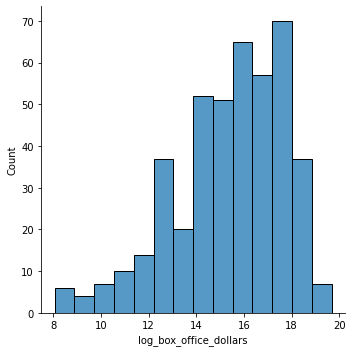

In [24]:
sns.displot(biopics['log_box_office_dollars'])

## Q8a: Use a boxplot to look at the relationship of log(box_office_dollars) and whether the subject of the biopic was a person of color or not

<AxesSubplot:xlabel='person_of_color', ylabel='log_box_office_dollars'>

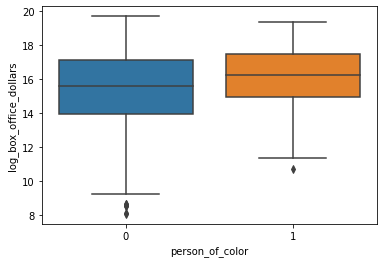

In [25]:
sns.boxplot(data=biopics, x='person_of_color', y = 'log_box_office_dollars')

## Q8b: Does it look like there's a difference between the two groups?

It doesn't look like there's a difference between the two groups, as the medians of the two groups are close to each other. In addition, although the ranges of the two groups are slightly different, they are almost overlapped.

## Q9: Conduct an ANOVA to determine if there are statistically significant differences between the two groups.

In [26]:
model = smf.ols('log_box_office_dollars ~ person_of_color', data=biopics)
res = model.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     4.127
Date:                    Tue, 23 Feb 2021   Prob (F-statistic):             0.0428
Time:                            20:10:18   Log-Likelihood:                -984.42
No. Observations:                     437   AIC:                             1973.
Df Residuals:                         435   BIC:                             1981.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

Set the critical value $\alpha = 0.05$.
As the p-value is 0.0428 < $\alpha$, there are statistically significant differences between the two groups.

## The t-test

To test of there's a statistically significant difference between two means, we
can use the independent sample t-test.  First, load up the right package:

In [27]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [28]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color" ] == 0]

In [29]:
ttest_ind(poc["log_box_office_dollars"],not_poc["log_box_office_dollars"])

Ttest_indResult(statistic=2.0314176362558167, pvalue=0.042820052741479)


## Q10: What does that mean?

Set the critical value $\alpha = 0.05$.
As the p-value is 0.0428 < $\alpha$, there are statistically significant differences between the two groups.

## ANOVA
Ok, that's pretty straight-forward.  Let's look at a more complex problem:

<AxesSubplot:xlabel='subject_race', ylabel='log_box_office_dollars'>

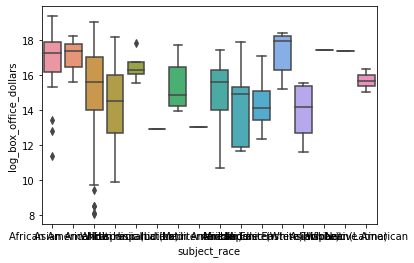

In [30]:
sns.boxplot(x="subject_race",y="log_box_office_dollars",data=biopics)

Without getting too worred about the fact that the axes are unreadable, it looks like
there are some differences between the different groups.  But are they real?

Let's start with an ANOVA:

In [31]:
box_office_dollars_lm = smf.ols('log_box_office_dollars ~ subject_race', data=biopics).fit()
table = sm.stats.anova_lm(box_office_dollars_lm, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table

,sum_sq,df,F,PR(>F)
subject_race,182.728250,15.0,2.566995,0.001263
Residual,1428.419809,301.0,NaN,NaN


In [32]:
res = smf.ols('log_box_office_dollars ~ subject_race',biopics).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     2.567
Date:                    Tue, 23 Feb 2021   Prob (F-statistic):            0.00126
Time:                            20:10:19   Log-Likelihood:                -688.41
No. Observations:                     317   AIC:                             1409.
Df Residuals:                         301   BIC:                             1469.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### Q11: Is there a statistically significant difference?

Set the critical value $\alpha = 0.05$.
As the p-value is 0.00126 < $\alpha$, there is a statistically significant difference.

Let's apply Tukey's HSD using the same model and see what we get.

### Q12: Write code to use Tukey's HSD test on the subject_race variable and interpret the results.

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
biopics = biopics.dropna(subset=['subject_race'])

In [35]:
res = pairwise_tukeyhsd(biopics['log_box_office_dollars'], biopics['subject_race'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
African,African American,1.9884,0.6818,-1.1618,5.1385,False
African,Asian,-1.0387,0.9,-5.757,3.6796,False
African,Asian American,2.1526,0.9,-3.0421,7.3472,False
African,Caribbean,2.517,0.9,-5.5306,10.5645,False
African,Hispanic (Latin American),0.4535,0.9,-3.2562,4.1632,False
African,Hispanic (Latina),2.4782,0.9,-5.5694,10.5257,False
African,Hispanic (Latino),1.5807,0.9,-3.1376,6.299,False
African,Hispanic (White),-0.4918,0.9,-5.2101,4.2265,False
African,Indian,-2.0048,0.9,-10.0524,6.0427,False
African,Mediterranean,-1.896,0.9,-9.9435,6.1516,False


The function sets the default critical value $\alpha = 0.05$, and the `reject` column in the result shows whether we reject the null hypothesis that there is no difference between the groups. 

We can see that we only reject the null hypothesis for 2 pairs: {African American, Multi racial}, and {African American, White}. Therefore, we have evidence that the groups within the pairs are different, but for all the other pairs, we don't reject the null hypothesis.

# <font color="green">END OF NOTEBOOK</font>
## Remember to submit HTML and IPYNB files via Canvas.